In [1]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from joblib import dump, load

from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

%matplotlib inline

h = .02  # step size in the mesh

In [2]:
names = ["Nearest Neighbors","Decision Tree", "Random Forest", "Naive Bayes", "Neural Net"]

In [3]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000)
    ]

In [4]:
def folder_finder(path):

    file_list = []

    for j in glob(path+"*.csv"):
        file_list.append(j)

    return file_list

def read_file(path):

    data = pd.read_csv(path, na_values = 'NaN', keep_default_na = False) 
    return data

def pd_to_np(data):
    
    if type(data) == np.ndarray:
      print('Data is already in numpy format!')
    else:
      data = data.values
      #print('Pandas to Numpy done!')

    return data


def string_to_index(activity_label):

    activity_class =[]
    har_class = {
                    'Cook':0,
                    'Eat':1,
                    'Phone':2,
                    'Read':3,
                    'Watch_TV':4
                }
    for label in activity_label:
        activity_class.append(har_class[label[0]])

    return activity_class


def data_loader(path, split=0.3):
    x = y = []
    feature_list = []
    
    pd_data = read_file(path)

    for i in pd_data:
        feature_list.append(i)

    selectData = pd_data.loc[:, feature_list[:-1]]
    activityLabel = pd_data.loc[:, ['activity']]
    x = pd_to_np(selectData)
    x = StandardScaler().fit_transform(x)
    y = string_to_index(activityLabel.values)
    y = np.asarray(y) 
    y = y.astype('int32')
    return x,y

def full_dataset(file_list):

    x=y = np.asarray([])
    x_temp =  y_temp =  []

    for i in range(len(file_list)):
        x_temp, y_temp = data_loader(file_list[i])

        if i == 0:
            x = x_temp
            y = y_temp
        else:
            x = np.concatenate([x, x_temp],axis=0)
            y  = np.concatenate([y ,y_temp],axis=0)
    return x,y

In [5]:
file_list = folder_finder("../Dataset/")
print(file_list)
print('Total files:',len(file_list))
X,y= full_dataset(file_list)
print(X.shape)
print(y.shape)

['../Dataset\\FImportance(ExtraTree).csv']
Total files: 1
(447530, 21)
(447530,)


In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
figure = plt.figure(figsize=(27, 9))

dmap = {
            0:'Cook',
            1:'Eat',
            2:'Phone',
            3:'Read',
            4:'Watch_TV'
        }

for i in range(len(file_list)):
    X,y = data_loader(file_list[i])
    pca = make_pipeline(StandardScaler(),PCA(n_components=5, random_state=42))
    pc_train = pca.fit_transform(X)
    print ("shape of pca",pc_train.shape)
    ex_variance=np.var(pc_train,axis=0)
    ex_variance_ratio = ex_variance/np.sum(ex_variance)
    print (ex_variance_ratio) 
    print("\nSum of ex_variance_ratio : ", np.sum(ex_variance_ratio)) 
#     pcaDf = pd.DataFrame(data = pc_train, columns = ['pc 1', 'pc 2','pc 3'])
#     pcaDf['Target'] = y
#     pcaDf['Target'] = pcaDf["Target"].map(dmap)
#     sns.FacetGrid(pcaDf,hue='Target',height=6).map(plt.scatter,'pc 1','pc 2','pc 3').add_legend()

shape of pca (447530, 5)
[0.41570872 0.18479291 0.16335797 0.13083765 0.10530275]

Sum of ex_variance_ratio :  1.0


<Figure size 1944x648 with 0 Axes>

In [7]:
# figure = plt.figure(figsize=(30, 30))

# count = 1

# for i in range(len(file_list)):
#     X,y = data_loader(file_list[i])
#     pca = PCA(n_components=3)
#     pc_train = pca.fit_transform(X)
#     pcaDf = pd.DataFrame(data = pc_train, columns = ['pc 1', 'pc 2','pc 3'])
#     pcaDf['Target'] = y
    
#     ax = plt.subplot(6, 2, count)
#     ax.scatter(X[:,0], y, color='r')
#     ax.set_xlabel('X 0')
#     ax.set_ylabel('y')
#     ax.set_title('X vs y')
    
#     ax = plt.subplot(6, 2, count+1)
#     ax.scatter(X[:,1], y, color='b')
#     ax.set_xlabel('X 1')
#     ax.set_ylabel('y')
#     ax.set_title('X vs y')
#     count+=2
#     plt.savefig('{:03d}.png'.format(len(file_list)))

# Classifier

In [8]:
X = pc_train
print(X.shape)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable]

(447530, 5)


Nearest Neighbors 0.757552566308404


C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Decision Tree 0.7638594060733359


C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Random Forest 0.7522680043795946
Naive Bayes 0.7693283131857083


C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Neural Net 0.7843496525372601


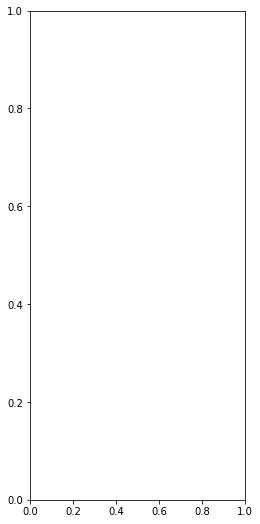

In [9]:
figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#     # just plot the dataset first
#     cm = plt.cm.RdBu
#     cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#     ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#     if ds_cnt == 0:
#         ax.set_title("Input data")
#     # Plot the training points
#     ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
#     # Plot the testing points
#     ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xticks(())
#     ax.set_yticks(())
#     i += 1

    

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
         clf.fit(X_train, y_train)
         score = clf.score(X_test, y_test)
         dump(clf, 'filename.joblib')
         print (name,score)
            


#         # Plot the decision boundary. For that, we will assign a color to each
#         # point in the mesh [x_min, x_max]x[y_min, y_max].
#          if hasattr(clf, "decision_function"):
#              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#          else:
#              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# #         # Put the result into a color plot
#          Z = Z.reshape(xx.shape)
#          #Z = Z.flatten().reshape(1960,420)
#          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
#          print(Z.shape)

# #         # Plot the training points
#          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
# #         # Plot the testing points
#          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

#          ax.set_xlim(xx.min(), xx.max())
#          ax.set_ylim(yy.min(), yy.max())
#          ax.set_xticks(())
#          ax.set_yticks(())
#          if ds_cnt == 0:
#              ax.set_title(name)
#          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
#                  size=15, horizontalalignment='right')
#          i += 1

# plt.tight_layout()
# plt.show()

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

def train_model(model, X_train, y_train):
    return model.fit(X_train, y_train)

def test_model(model,X_test):
    pred = model.predict(X_test)
    return pred
    
def model_init():

    #model = classifiers[5]
    model = MLPClassifier(alpha=1, max_iter=1000)
    return model
    
def heatmap_cm(cmn):
    
    
    plt.figure(figsize = (10,8))
    cmap = sns.dark_palette("muted purple", input="xkcd")
    fn_s = 15
    #plt.figure(figsize = (10,8))
    sns.heatmap(cmn, annot=True, cmap=cmap ,fmt='.3f')
    plt.tight_layout()
    
    plt.title('Confusion matrix', y=1.1, fontsize = fn_s)
    plt.ylabel('Actual label', fontsize = fn_s)
    plt.xlabel('Predicted label', fontsize = fn_s)
    plt.show()
    
    fig = ax.get_figure()
    fig.savefig('hist.png')
    
    
# For model evolution
def model_evalution(y_test, y_pred):
    #confusion_matrix(y_test, y_pred)
    print("------------------- Model evaluation ----------------\n\n")
    print("--------------------------------------------")
    print("Accuracy Score : ",accuracy_score(y_test,y_pred))
    print("Classification Report : \n",classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    x_axis_labels  = y_axis_labels =  ['Cook','Eat','Phone','Read','Watch_TV']
    cmn = pd.DataFrame(cmn,index=x_axis_labels,columns=y_axis_labels)
    heatmap_cm(cmn)
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
  
    print("--------------------------------------------")
    print("")
    


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
X_train.shape

(268518, 5)

In [12]:
model = model_init()
net = train_model(model,X_train,y_train)

------------------- Model evaluation ----------------


--------------------------------------------
Accuracy Score :  0.7852490335843407
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     21335
           1       0.00      0.00      0.00      3721
           2       0.36      0.07      0.11     12117
           3       0.61      0.35      0.45     21366
           4       0.81      0.95      0.87    120473

   micro avg       0.79      0.79      0.79    179012
   macro avg       0.51      0.44      0.45    179012
weighted avg       0.73      0.79      0.74    179012



C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mahbuba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


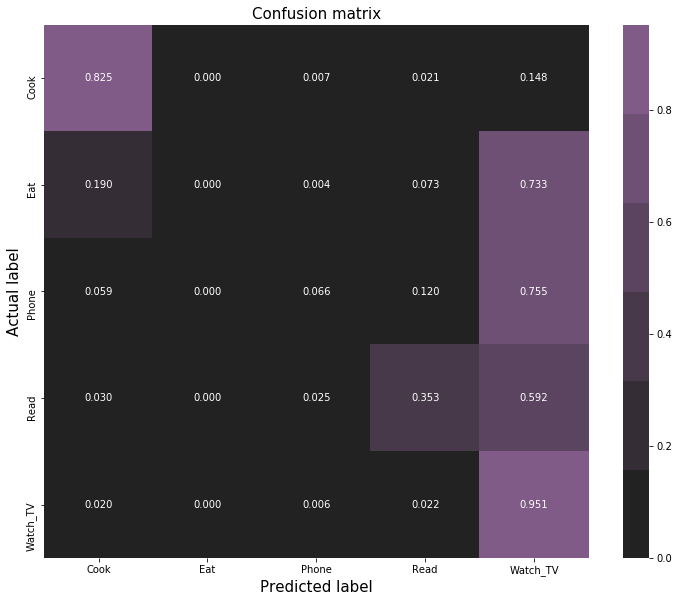

Confusion Matrix : 
 [[ 17592      0    150    446   3147]
 [   707      0     16    272   2726]
 [   713      0    800   1452   9152]
 [   638      0    536   7547  12645]
 [  2440      0    698   2705 114630]]
--------------------------------------------



In [13]:
y_pred = test_model(net,X_test)
model_evalution(y_test, y_pred)

In [14]:
# for name, clf in zip(names, classifiers):
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print(score)

In [15]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig